# Linear Regression 

## import library

In [1]:
import numpy as np
import matplotlib.image as img
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.mplot3d import Axes3D

## load point data 

In [15]:
print(data_load.shape)
print(data_load[0].shape)
print(data_load[1].shape)
print(data_load[1][0])
print(y[0])
print(data_load[0][0])
print(x[0])

(2, 256)
(256,)
(256,)
-13.010656
-13.010656
-10.0
-10.0


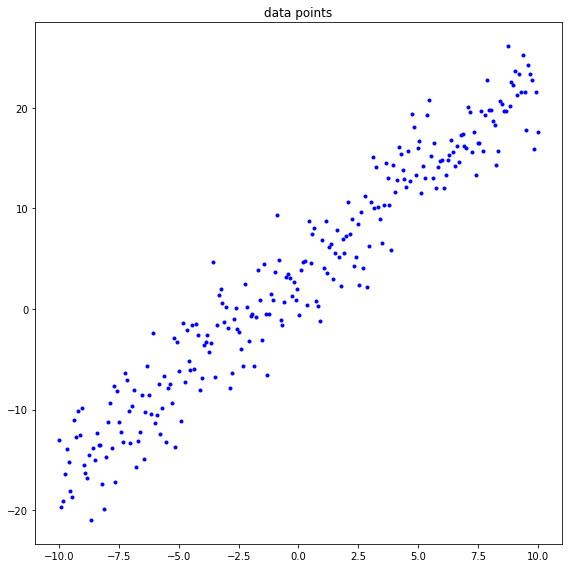

In [2]:
filename    = 'assignment_06_data.csv'
data_load   = np.loadtxt(filename, delimiter = ',')

x   = data_load[0, :]
y   = data_load[1, :]

plt.figure(figsize=(8,8))

plt.plot(x, y, '.', color = 'blue')
plt.title('data points')

plt.tight_layout()
plt.show()

## compute the loss function

In [17]:
len(x)

256

In [54]:
# compute f(x)
def model_function(x_component, theta0, theta1):
    model = theta0 + theta1 * x_component
    return model

In [63]:
# Squared Error 
def squared_error(x_component, y_component, theta0, theta1):
    error = model_function(x_component, theta0, theta1)
    error_squared = (error - y_component) ** 2
    return error_squared

In [65]:
# compute loss function
# x, y, theta 0, 1을 기반으로 loss를 계산하는 함수를 정의
def compute_loss(x, y, theta0, theta1):
    n = len(x)
    loss = 0
    for count in range(n):
        x_component = x[count]
        y_component = y[count]
        loss_n = squared_error(x_component, y_component, theta0, theta1)
        loss = loss + loss_n  
        
    loss = loss / (2 * n)        
    return loss

In [64]:
k = squared_error(2, 3, 1, 1)
type(k)

int

## compute the gradient for each model parameter

In [66]:
def compute_gradient_theta0(x, y, theta0, theta1):
    dL = 0
    n = len(x)
    for count in range(n):
        dL = dL + (model_function(x[count], theta0, theta1) - y[count])    
    dL = dL / n
    return dL

In [67]:
def compute_gradient_theta1(x, y, theta0, theta1):
    dL = 0
    n = len(x)
    for count in range(n):
        dL = dL + (model_function(x[count], theta0, theta1) - y[count]) * x[count]
        
    dL = dL / n
    return dL

## gradient descent for each model parameter

In [105]:
num_iteration       = 1000
learning_rate       = 0.01

theta0              = 0
theta1              = 0

theta0_iteration    = np.zeros(num_iteration)
theta1_iteration    = np.zeros(num_iteration)
loss_iteration      = np.zeros(num_iteration)

In [106]:
for i in range(num_iteration):

    theta0  = theta0 - learning_rate * compute_gradient_theta0(x, y, theta0, theta1)
    theta1  = theta1 - learning_rate * compute_gradient_theta1(x, y, theta0, theta1)
    loss    = compute_loss(x, y, theta0, theta1)

    theta0_iteration[i] = theta0
    theta1_iteration[i] = theta1
    loss_iteration[i]   = loss

    # print("iteration = %4d, loss = %5.5f" % (i, loss))

In [107]:
optimal_theta0 = theta0_iteration[len(theta0_iteration) - 1]
optimal_theta1 = theta1_iteration[len(theta1_iteration) - 1]
f = optimal_theta0 + optimal_theta1 * x

## plot the results

In [108]:
# 01. plot the input data in blue point and the regression result in red curve
def plot_data_regression(x, y, f):

    plt.figure(figsize=(8,6))
    plt.title('linear regression result')
    
    plt.plot(x, y, color = "blue")
    plt.plot(x, f, color = "red")
    
    plt.tight_layout()
    plt.show()

In [109]:
# 03. plot the loss values L(theta) in red curve over the gradient descent iterations
def plot_loss_curve(loss_iteration):

    plt.figure(figsize=(8,6))
    plt.title('loss curve')

    plt.plot(loss_iteration, color = 'red')
    
    plt.tight_layout()
    plt.show()

In [114]:
# 02. plot the values of the model parameters  𝜃0  in blue curve and  𝜃1  in green curve over the gradient descent iterations
def plot_model_parameter(theta0_iteration, theta1_iteration):

    plt.figure(figsize=(8,6))
    plt.title('model parameter')

    plt.plot(theta0_iteration, color = "blue")
    plt.plot(theta1_iteration, color = "green")

    plt.tight_layout()
    plt.show()

In [124]:
# 04. plot the loss surface in 3-dimension surface where 𝑥-axis represents 𝜃0, 𝑦-axis represents 𝜃1 and 𝑧-axis represents  
X0  = np.arange(-10, 10, 0.1)
X1  = np.arange(-10, 10, 0.1)

In [162]:
grid_theta0, grid_theta1 = np.meshgrid(X0, X1)


grid_loss = compute_loss(x, y, grid_theta0, grid_theta1)

In [141]:
def plot_loss_surface(grid_theta0, grid_theta1, grid_loss):

    fig = plt.figure(figsize=(8,8))
    ax = fig.gca(projection='3d')
    
    plt.title('loss surface')
    
    ax.plot_surface(grid_theta0, grid_theta1, grid_loss)

    
    plt.tight_layout()
    plt.show()

# * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *

# * results

# * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *

### # 01. plot the input data in blue point and the regression result in red curve

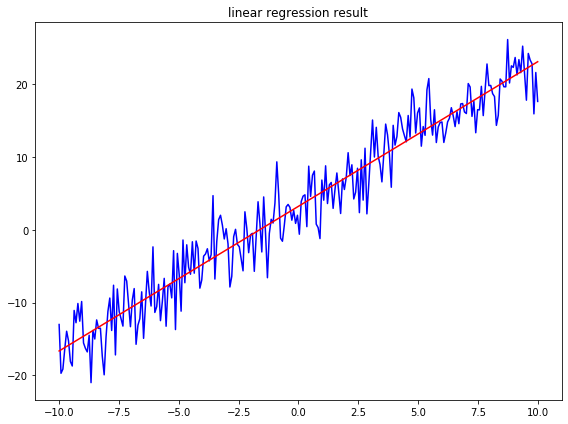

In [111]:
plot_data_regression(x, y, f)

### # 02. plot the values of the model parameters $\theta_0$ in blue curve and $\theta_1$ in green curve over the gradient descent iterations

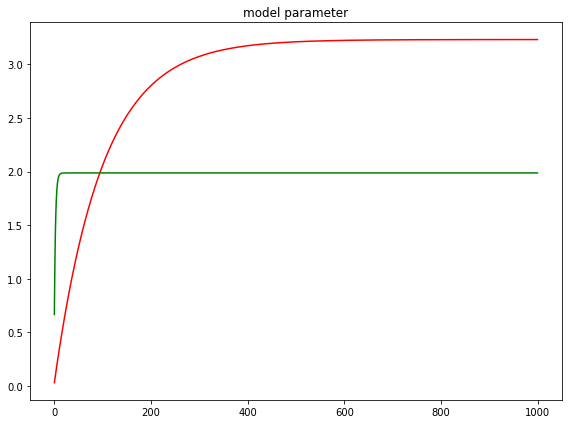

In [112]:
plot_model_parameter(theta0_iteration, theta1_iteration)

### # 03. plot the loss values $\mathcal{L}(\theta)$ in red curve over the gradient descent iterations

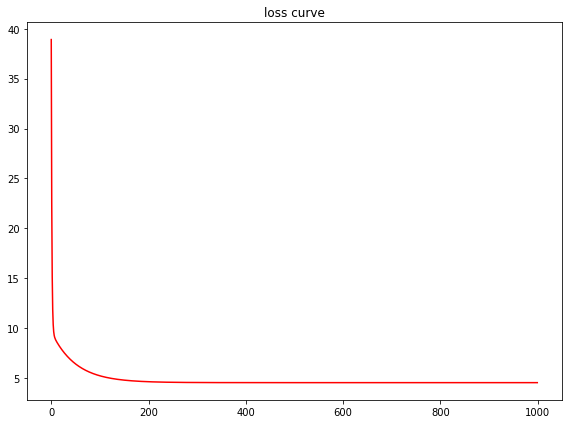

In [113]:
plot_loss_curve(loss_iteration)

### # 04. plot the loss surface in 3-dimension surface where $x$-axis represents $\theta_0$, $y$-axis represents $\theta_1$ and $z$-axis represents $\mathcal{L}$

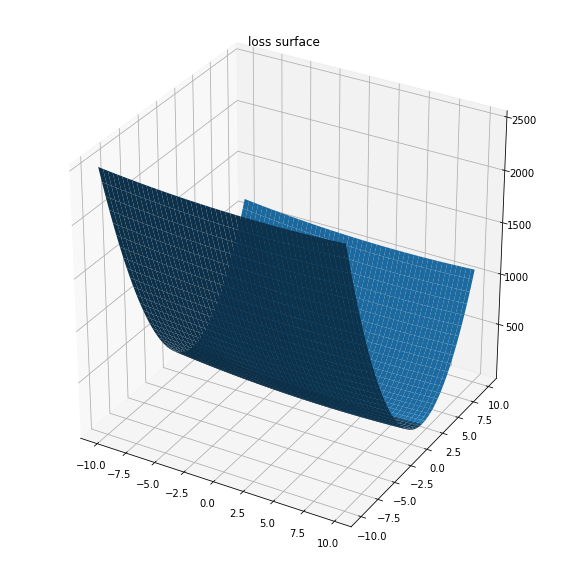

In [155]:
plot_loss_surface(grid_theta0, grid_theta1, grid_loss)